# Competitive Market Intelligence

Explore the 2023 market dataset:
- Distribution of premiums, volatility, and sales
- Brand comparisons
- Derived market intelligence features

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sneaker_intel.data import load_dataset, DatasetType
from sneaker_intel.features.market import MarketDynamicsExtractor
from sneaker_intel.analysis.market_dynamics import MarketDynamicsAnalyzer
from sneaker_intel.visualization.style import apply_nike_style

apply_nike_style()

df = load_dataset(DatasetType.MARKET_2023)
print(f'Shape: {df.shape}')
df.head()

Shape: (2000, 17)


,item,brand,retail,release,lowestAsk,numberOfAsks,salesThisPeriod,highestBid,numberOfBids,annualHigh,annualLow,volatility,deadstockSold,pricePremium,averageDeadstockPrice,lastSale,changePercentage
0,Jordan 4 Retro SB Pine Green,Jordan,225,2023-03-21,325,1995,2675,480,3697,952,280,0.061347,5408,0.542,388,347,0.000000
1,Jordan 3 Retro White Cement Reimagined,Jordan,210,2023-03-11,190,2361,1289,280,2597,757,150,0.115522,16894,0.111,297,234,0.016666
2,Nike Air Force 1 Low Tiffany & Co. 1837,Nike,400,2023-03-07,893,1310,282,1526,2436,4831,705,0.232434,4711,1.125,1160,850,-0.132653
3,Nike Air Max 1 '86 Big Bubble Sport Red,Nike,150,2023-03-26,177,704,240,200,366,550,150,0.095096,603,0.200,228,180,0.000000
4,MSCHF Big Red Boot,MSCHF,350,2023-02-16,570,334,68,611,345,2445,498,0.186197,323,1.373,883,831,0.037438


In [2]:
# Overview stats
analyzer = MarketDynamicsAnalyzer(df)
overview = analyzer.overview()
for k, v in overview.items():
    print(f'{k}: {v}')

total_products: 2000
total_brands: 23
avg_premium: 0.378
median_premium: 0.198
avg_volatility: 0.1324
total_deadstock_sold: 12563259


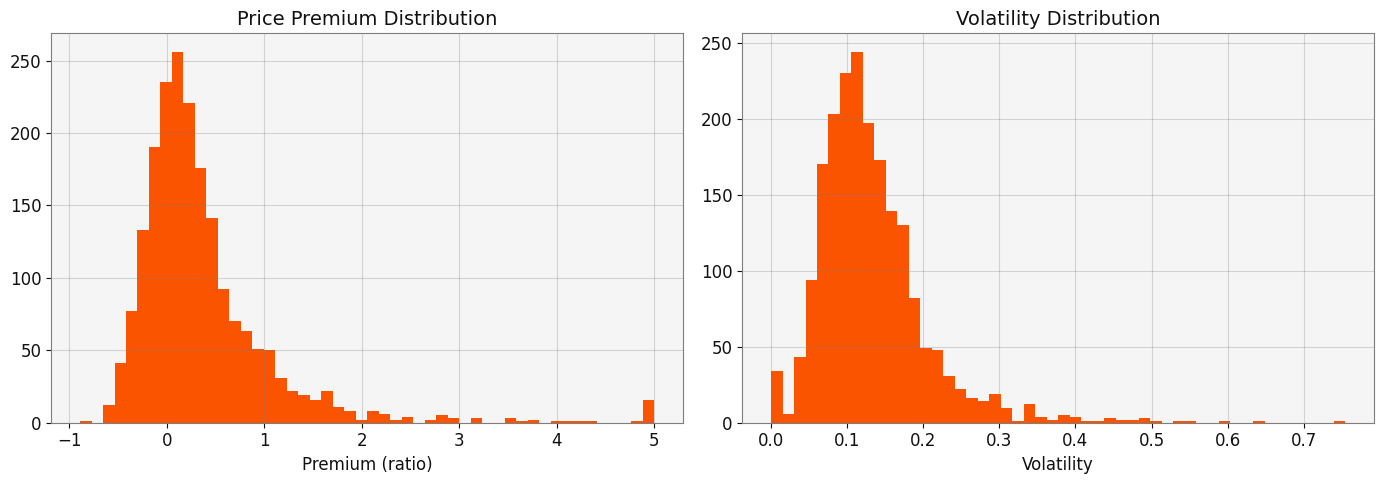

In [3]:
# Premium distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
df['pricePremium'].clip(-1, 5).hist(bins=50, ax=axes[0])
axes[0].set_title('Price Premium Distribution')
axes[0].set_xlabel('Premium (ratio)')

df['volatility'].hist(bins=50, ax=axes[1])
axes[1].set_title('Volatility Distribution')
axes[1].set_xlabel('Volatility')
plt.tight_layout()
plt.show()

In [4]:
# Brand comparison
brand_df = analyzer.liquidity_analysis()
brand_df.head(15)

,avg_bids,avg_asks,avg_deadstock,avg_sales
brand,,,,
adidas,210.2,695.7,9630.2,83.0
UGG,32.8,160.0,8091.5,28.3
Jordan,234.9,670.8,7178.8,55.3
Nike,188.0,440.8,5536.5,57.1
Birkenstock,65.0,250.0,4366.0,19.0
Converse,85.2,265.9,3601.4,24.7
Timberland,66.0,153.0,3138.0,15.0
Puma,103.6,271.2,2967.3,41.5
Crocs,106.8,359.5,2965.1,52.8


In [5]:
# Derived market features
extractor = MarketDynamicsExtractor()
enriched = extractor.extract(df)
enriched[['item', 'brand'] + extractor.feature_names].describe().round(3)

,bid_ask_spread,bid_ask_spread_pct,demand_supply_ratio,price_range_pct,sell_through_ratio,premium_sustainability
count,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000
mean,-59.253,-0.363,0.469,2.605,0.040,0.948
std,97.326,0.429,0.382,2.542,0.102,0.189
min,-1881.000,-11.507,0.040,0.000,0.001,0.400
25%,-73.000,-0.484,0.255,1.424,0.004,0.821
50%,-39.000,-0.271,0.374,1.974,0.009,0.928
75%,-16.000,-0.131,0.561,2.815,0.031,1.047
max,154.000,0.332,5.150,32.625,1.000,2.032


In [6]:
# Most volatile sneakers
volatile = analyzer.volatility_drivers(top_n=15)
volatile

,item,brand,retail,volatility,pricePremium,deadstockSold
0,adidas Yeezy BSKTBL Knit Slate Azure,adidas,300,0.754551,-0.317,19
1,Nike Air Monarch IV White Navy,Nike,65,0.634561,-0.446,1048
2,Nike Air Max 90 Premium Lucky Charms (W),Nike,130,0.588851,-0.515,534
3,adidas Yeezy Boost 350 V2 Cream/Triple White,adidas,220,0.555619,0.368,8732
4,Jordan 6 Retro Travis Scott British Khaki,Jordan,250,0.534157,0.600,3189
5,New Balance 2002R Protection Pack Rain Cloud,New Balance,150,0.512381,0.241,9643
6,Nike Blazer Mid 77 Indigo (W),Nike,110,0.494329,-0.200,7268
7,Jordan 4 Retro Union Guava Ice,Jordan,250,0.491353,1.228,1292
8,Nike Dunk Low Retro Reverse Panda,Nike,110,0.486782,0.482,3126
9,Hoka One One Bondi 7 Black,Hoka One One,150,0.475915,-0.467,2459


In [7]:
# Market inefficiencies
inefficient = analyzer.market_inefficiencies()
print(f'Found {len(inefficient)} market inefficiencies (highestBid > lowestAsk)')
inefficient.head(10)

Found 1861 market inefficiencies (highestBid > lowestAsk)


,item,brand,lowestAsk,highestBid,arbitrage_pct
0,Nike SB Dunk Low Cherry,Nike,146,1826,11.5068
1,Nike Air Max 1 Premium Wabi-Sabi (W),Nike,175,735,3.2000
2,Jordan 7 Retro Trophy Room New Sheriff in Town,Jordan,130,480,2.6923
3,Nike Kyrie Flytrap 4 White Purple Pulse,Nike,74,250,2.3784
4,Jordan 12 Retro SP A Ma Maniére Black (Women's),Jordan,102,335,2.2843
5,Nike SB Dunk Low Mummy,Nike,232,720,2.1034
6,Jordan 1 Retro High OG Rebellionaire,Jordan,146,450,2.0822
7,Nike Air VaporMax Plus Triple Black,Nike,150,450,2.0000
8,adidas Samba Team Mexico,adidas,84,250,1.9762
9,Jordan Lift Off South Beach,Jordan,59,175,1.9661
